In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contradictory-my-dear-watson/sample_submission.csv
/kaggle/input/contradictory-my-dear-watson/train.csv
/kaggle/input/contradictory-my-dear-watson/test.csv


In [2]:
import matplotlib.pyplot as plt

## Loading and exploring the data 

In [3]:
df_train = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/train.csv')
df_test = pd.read_csv('/kaggle/input/contradictory-my-dear-watson/test.csv')

In [4]:
df_train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [5]:
df_test.tail()

,id,premise,hypothesis,lang_abv,language
5190,5f90dd59b0,نیند نے وعدہ کیا کہ موٹل نے سوال میں تحقیق کی.,نیمیتھ کو موٹل کی تفتیش کے لئے معاوضہ دیا جارہ...,ur,Urdu
5191,f357a04e86,The rock has a soft texture and can be bough...,The rock is harder than most types of rock.,en,English
5192,1f0ea92118,她目前的存在，并考虑到他与沃佛斯顿争执的本质，那是尴尬的。,她在与Wolverstone的打斗结束后才在场的事实被看作是很尴尬的。,zh,Chinese
5193,0407b48afb,isn't it i can remember i've only been here ei...,I could see downtown Dallas from where I lived...,en,English
5194,16c2f2ab89,"In Hong Kong you can have a plate, or even a w...",It's impossible to have a plate hand-painted t...,en,English


In [6]:
df_train.shape, df_test.shape

((12120, 6), (5195, 5))

In [7]:
df_train.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64

In [8]:
df_test.isnull().sum()

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
dtype: int64

In [9]:
df_train.duplicated().sum()

0

<AxesSubplot:>

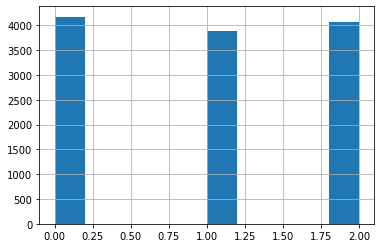

In [10]:
# check whether target value is skewed
df_train.label.hist()

In [11]:
# how many languages is in dataset
print('train lang_abv: ', len(df_train.lang_abv.unique()), ', languages: ', len(df_train.language.unique()))
print('test lang_abv: ', len(df_test.lang_abv.unique()), ', languages: ', len(df_test.language.unique()))
print('train lang & test lang: ', len(set(df_train.lang_abv.unique()) and set(df_test.lang_abv.unique())))

train lang_abv:  15 , languages:  15
test lang_abv:  15 , languages:  15
train lang & test lang:  15


In [12]:
# great, there is the same set of languages in both train and test datasets
# lets see what exact languages are presented and how diff sentences in diff languages look like
for lang in df_train.lang_abv.unique():
    first_row = df_train[df_train.lang_abv == lang].iloc[0]
    print(first_row.language, first_row.premise)

English and these comments were considered in formulating the interim rules.
French Des petites choses comme celles-là font une différence énorme dans ce que j'essaye de faire.
Thai ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสดงออกและได้เล่นหลายบทบาทไปพร้อมกัน ๆ อาจช่วยให้เด็กจับความคล้ายคลึงและความแตกต่างระหว่างผู้คนในด้านความปรารถนา ความเชื่อ และความรู้สึกได้
Turkish Bir çiftlikte birisinin, ağıla kapatılmış bu öküzleri kesmeliyiz dediğini duyabilirsiniz bu muhtemelen şu anlama gelir, yüklenecek olanları ayırın.
Urdu ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی آئی کے ایجنٹوں کے ذریعے ہوائی اڈے پر ملاقات کی، تحقیقات کی، اور اگلے دن وفاقی گرین جوری سے پہلے اسامہ بن لادن کی تحقیقات سے ملاقات کی.
Russian Через каждые сто градусов пятна краски меняют свой цвет, она может быть красной и изменить цвет на синий.
Bulgarian Може да не сме имали всичко, което сме искали или сме видели, че други хора имат, но тя осигуряваше необходимите неща, от които се нуждаехме.
German Es fallen zwanzig P

## TPU Setup

In [13]:
import tensorflow as tf

2022-05-05 04:43:02.383830: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-05-05 04:43:02.383968: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

2022-05-05 04:43:07.196761: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-05-05 04:43:07.199010: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2022-05-05 04:43:07.199063: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-05 04:43:07.199095: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6a08a28f0ad2): /proc/driver/nvidia/version does not exist
2022-05-05 04:43:07.202757: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [15]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on TPU  ['10.0.0.2:8470']
Number of accelerators:  8


## BERT 

In [16]:
from transformers import TFAutoModel, AutoTokenizer

In [17]:
def input_convert(data):
        # -in- data - list of dict
        # -out- inputs - dict of <key + list>
        
        inputs = {
            'input_word_ids': [],
            'input_mask': [],
            'input_type_ids': []
        }
        
        for i in data:
            inputs['input_word_ids'].append(i['input_ids'])
            inputs['input_mask'].append(i['attention_mask'])
            inputs['input_type_ids'].append(i['token_type_ids'])
            
        inputs['input_word_ids'] = tf.ragged.constant(inputs['input_word_ids']).to_tensor()
        inputs['input_mask'] = tf.ragged.constant(inputs['input_mask']).to_tensor()
        inputs['input_type_ids'] = tf.ragged.constant(inputs['input_type_ids']).to_tensor()
           
        return inputs

In [18]:
y = df_train.pop('label')
df = pd.concat([df_train, df_test], ignore_index = True)
df_train.shape, df_test.shape, df.shape

((12120, 5), (5195, 5), (17315, 5))

In [19]:
model_name = 'bert-base-multilingual-uncased'

 # tokenizing
tokenizer = AutoTokenizer.from_pretrained(model_name)
print(type(tokenizer))

mask = []
for i in range(len(df)):
    padded_seq = tokenizer(df['premise'][i], df['hypothesis'][i], padding = True, 
                           add_special_tokens = True, return_token_type_ids = True)
    mask.append(padded_seq)

inputs = input_convert(mask)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [20]:
# split df into train and test
inputs_train = {}
inputs_test = {}

for key in inputs.keys():
    inputs_train[key] = inputs[key][:len(y), :]
    inputs_test[key] = inputs[key][len(y):, :]

In [21]:
# build model
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    max_len = inputs['input_word_ids'].shape[1]
    
    encoder = TFAutoModel.from_pretrained(model_name)
    
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    input_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_type_ids")

    embedding = encoder([input_word_ids, input_mask, input_type_ids])[0]
    dense1 = Dense(256, activation='relu')(embedding[:,0,:])
    dense2 = Dense(32, activation='relu')(dense1)
    output = Dense(3, activation='softmax')(dense2)

    model = Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs = output)
    model.compile(Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'], steps_per_execution = 100)

# fit the model
early_stop = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
model.fit(inputs_train, y.values, epochs = 10, verbose = 1, validation_split = 0.1,
                    batch_size = 16 * strategy.num_replicas_in_sync, callbacks = [early_stop])

Downloading:   0%|          | 0.00/999M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10
86/86 [==============================] - 144s 2s/step - loss: 1.0716 - accuracy: 0.4099 - val_loss: 0.9741 - val_accuracy: 0.5322
Epoch 2/10
86/86 [==============================] - 12s 134ms/step - loss: 0.9057 - accuracy: 0.5864 - val_loss: 0.8331 - val_accuracy: 0.6163
Epoch 3/10
86/86 [==============================] - 12s 134ms/step - loss: 0.7796 - accuracy: 0.6580 - val_loss: 0.8118 - val_accuracy: 0.6320
Epoch 4/10
86/86 [==============================] - 13s 146ms/step - loss: 0.6686 - accuracy: 0.7137 - val_loss: 0.8189 - val_accuracy: 0.6469
Epoch 5/10
86/86 [==============================] - 12s 134ms/step - loss: 0.5634 - accuracy: 0.7706 - val_loss: 0.8329 - val_accuracy: 0.6708
Epoch 6/10
86/86 [==============================] - 12s 134ms/step - loss: 0.4681 - accuracy: 0.8138 - val_loss: 0.8689 - val_accuracy: 0.6733


In [22]:
# make predictions
predictions = [np.argmax(i) for i in model.predict(inputs_test)]

In [23]:
# submit the result
submission = df_test.id.copy().to_frame()
submission['prediction'] = predictions

In [24]:
submission.head()

,id,prediction
0,c6d58c3f69,2
1,cefcc82292,1
2,e98005252c,0
3,58518c10ba,1
4,c32b0d16df,1


In [25]:
submission.shape

(5195, 2)

In [26]:
submission.to_csv("submission.csv", index = False)